# Freemuxlet results

scATAC-seq samples

In [1]:
import pandas as pd
import seaborn as sns
#import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from itertools import combinations
import glob

In [2]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/full_2_cistopic


In [3]:
import os
wdir = '/lustre1/project/stg_00090/scatac_benchmark/full_2_cistopic'
os.chdir( wdir )

In [4]:
base_dir = 'out_fmx/data/freemuxlet'
samples = [x.split('/')[-1].split('_freemuxlet.clust1.vcf.gz')[0] for x in sorted(glob.glob(base_dir + '/*_freemuxlet.clust1.vcf.gz'))]
vcf_path_dict = {
        x: os.path.join(base_dir, x + '_freemuxlet.clust1.vcf.gz') for x in samples
        }
vcf_path_dict

{'BIO_ddseq_1.FULL': 'out_fmx/data/freemuxlet/BIO_ddseq_1.FULL_freemuxlet.clust1.vcf.gz',
 'BIO_ddseq_2.FULL': 'out_fmx/data/freemuxlet/BIO_ddseq_2.FULL_freemuxlet.clust1.vcf.gz',
 'BIO_ddseq_3.FULL': 'out_fmx/data/freemuxlet/BIO_ddseq_3.FULL_freemuxlet.clust1.vcf.gz',
 'BIO_ddseq_4.FULL': 'out_fmx/data/freemuxlet/BIO_ddseq_4.FULL_freemuxlet.clust1.vcf.gz',
 'BRO_mtscatac_1.FULL': 'out_fmx/data/freemuxlet/BRO_mtscatac_1.FULL_freemuxlet.clust1.vcf.gz',
 'BRO_mtscatac_2.FULL': 'out_fmx/data/freemuxlet/BRO_mtscatac_2.FULL_freemuxlet.clust1.vcf.gz',
 'CNA_10xmultiome_1.FULL': 'out_fmx/data/freemuxlet/CNA_10xmultiome_1.FULL_freemuxlet.clust1.vcf.gz',
 'CNA_10xmultiome_2.FULL': 'out_fmx/data/freemuxlet/CNA_10xmultiome_2.FULL_freemuxlet.clust1.vcf.gz',
 'CNA_10xv11_1.FULL': 'out_fmx/data/freemuxlet/CNA_10xv11_1.FULL_freemuxlet.clust1.vcf.gz',
 'CNA_10xv11_2.FULL': 'out_fmx/data/freemuxlet/CNA_10xv11_2.FULL_freemuxlet.clust1.vcf.gz',
 'CNA_10xv11_3.FULL': 'out_fmx/data/freemuxlet/CNA_10xv11_3.

In [6]:
# bcftools filters:
min_DP = 10
min_GQ = 10

fmx_samples = ['CLUST0', 'CLUST1']

intermediate_dir = 'out_fmx/data/freemuxlet'
tmp_dir = 'out_fmx/tmp'

# the file {sample_rename} contains a single line with the new sample name to use in place of the existing CLUST0, CLUST1, etc.

filtered_vcfs = []
parallel_filename = "vcf_concordance.parallel"
with open(parallel_filename, 'w') as f:
    for n,(fmxVCFname,fmxVCF) in enumerate(vcf_path_dict.items()):
        for sample in fmx_samples:
            f_vcf = f"{fmxVCFname}.{sample}.vcf.gz"
            filtered_vcfs.append(f_vcf)
            command = f"bcftools view -s {sample} -i 'MIN(FMT/DP)>{min_DP} & MIN(FMT/GQ)>{min_GQ}' {fmxVCF} -O v | bcftools reheader -s out_fmx/sample_rename | bcftools view -O z -o {tmp_dir}/{f_vcf} && tabix -p vcf -f {tmp_dir}/{f_vcf}"
            
            f.write(f"{command}\n")
            print(command)
            
parallel_filename = "vcf_concordance2.parallel"
with open(parallel_filename, 'w') as f:
    for i,x in enumerate(filtered_vcfs):
        for j,y in enumerate(filtered_vcfs):
            v0 = x.replace(".vcf.gz","")
            v1 = y.replace(".vcf.gz","")
            command = f"vcf-compare -g {tmp_dir}/{x} {tmp_dir}/{y} > {tmp_dir}/{v0}_{v1}.vcfcompare"
            
            f.write(f"{command}\n")
            print(command)

bcftools view -s CLUST0 -i 'MIN(FMT/DP)>10 & MIN(FMT/GQ)>10' out_fmx/data/freemuxlet/BIO_ddseq_1.FULL_freemuxlet.clust1.vcf.gz -O v | bcftools reheader -s out_fmx/sample_rename | bcftools view -O z -o out_fmx/tmp/BIO_ddseq_1.FULL.CLUST0.vcf.gz && tabix -p vcf -f out_fmx/tmp/BIO_ddseq_1.FULL.CLUST0.vcf.gz
bcftools view -s CLUST1 -i 'MIN(FMT/DP)>10 & MIN(FMT/GQ)>10' out_fmx/data/freemuxlet/BIO_ddseq_1.FULL_freemuxlet.clust1.vcf.gz -O v | bcftools reheader -s out_fmx/sample_rename | bcftools view -O z -o out_fmx/tmp/BIO_ddseq_1.FULL.CLUST1.vcf.gz && tabix -p vcf -f out_fmx/tmp/BIO_ddseq_1.FULL.CLUST1.vcf.gz
bcftools view -s CLUST0 -i 'MIN(FMT/DP)>10 & MIN(FMT/GQ)>10' out_fmx/data/freemuxlet/BIO_ddseq_2.FULL_freemuxlet.clust1.vcf.gz -O v | bcftools reheader -s out_fmx/sample_rename | bcftools view -O z -o out_fmx/tmp/BIO_ddseq_2.FULL.CLUST0.vcf.gz && tabix -p vcf -f out_fmx/tmp/BIO_ddseq_2.FULL.CLUST0.vcf.gz
bcftools view -s CLUST1 -i 'MIN(FMT/DP)>10 & MIN(FMT/GQ)>10' out_fmx/data/freemuxl

# Run in parallel in bash

```
module load BCFtools
module load VCFtools
time cat vcf_concordance.parallel | parallel -j 16 --progress
```

```
module load BCFtools
module load VCFtools
time cat vcf_concordance2.parallel | parallel -j 16 --progress
```

Warnings `Warning: Read 0 lines from out_fmx/tmp/BIO_ddseq_1.FULL.CLUST1.vcf.gz, the tabix index may be broken.` are normal, as some samples only contain 1 genotype.

# Then

In [36]:
fmx_samples = ['CLUST0', 'CLUST1']
tmp_dir = 'out_fmx/tmp'

nvar = []
nrd = []
for r1ix,r1 in enumerate(samples):
    for s1ix,s1 in enumerate(fmx_samples):
        nvar_tmp2 = [f"{r1}.{s1}"]
        nrd_tmp2 = [f"{r1}.{s1}"]
        cnames = []
        for r2ix,r2 in enumerate(samples):
            for s2ix,s2 in enumerate(fmx_samples):
                f_comp = f"{tmp_dir}/{r1}.{s1}_{r2}.{s2}.vcfcompare"
                with open(f_comp,'r') as f:
                    dat = f.read().splitlines()
                # number of variants compared ((fix this!)):
                # the VN rows contain overlap/unique counts per file
                # we need to check if there's an entry for both vcfs; this would indicate there are variants overlapping
                # absence of such an entry would indicate no overlapping variants
                tmp_nvar = [ y for y in dat if y.startswith("VN") ]
                tmp_nvar_split = [ x.split('\t') for x in tmp_nvar ]
                v_overlap = 0
                for i,x in enumerate(tmp_nvar_split):
                    vcf_cnt = sum([ "vcf.gz" in y for y in x ])
                    if(vcf_cnt==2):
                        # number of variants overlapping:
                        v_overlap = x[1]
                nvar_tmp2.append(str(v_overlap))

                ## # old method of getting number of variants overlapping: (doesn't work correctly)
                ## tmp_sn = [ y.split('\t')[2] for y in dat if y.startswith("SN") ][:3]
                ## tmp_nvar = sum([ int(y) for y in tmp_sn ])
                ## nvar_tmp2.append(str(tmp_nvar))

                # non reference discord rate:
                #if(v_overlap==0):
                #    tmp_nrd = "NA"
                #else:
                tmp_nrd = [ y for y in dat if y.startswith("SN\tNon-reference") ]
                tmp_nrd = tmp_nrd[0].split('\t')[-1]
                nrd_tmp2.append(tmp_nrd)
                cnames.append(f"{r2}.{s2}")
        nrd.append(nrd_tmp2)
        nvar.append(nvar_tmp2)

# write to file:
f_nvar = open('out_fmx/genotype_concordance_nvar.txt','w')
f_nrd = open('out_fmx/genotype_concordance_nrd.txt','w')
print('\t'.join(['']+cnames), file=f_nvar)
print('\t'.join(['']+cnames), file=f_nrd)
for i,x in enumerate(nvar):
    print('\t'.join(x), file=f_nvar)
    print('\t'.join(nrd[i]), file=f_nrd)
f_nvar.close()
f_nrd.close()

print("Created two files:\n\tgenotype_concordance_nvar.txt\n\tgenotype_concordance_nrd.txt\n")



Created two files:
	genotype_concordance_nvar.txt
	genotype_concordance_nrd.txt



In [38]:
f_nrd = 'out_fmx/genotype_concordance_nrd.txt'
f_nvar = 'out_fmx/genotype_concordance_nvar.txt'

nrd = pd.read_csv(f_nrd, sep='\t', header=0, index_col=0)
nvar = pd.read_csv(f_nvar, sep='\t', header=0, index_col=0)

In [39]:
# the non-reference discordance rate computed by VCFtools
nrd.round(1)

,BIO_ddseq_1.FULL.CLUST0,BIO_ddseq_1.FULL.CLUST1,BIO_ddseq_2.FULL.CLUST0,BIO_ddseq_2.FULL.CLUST1,BIO_ddseq_3.FULL.CLUST0,BIO_ddseq_3.FULL.CLUST1,BIO_ddseq_4.FULL.CLUST0,BIO_ddseq_4.FULL.CLUST1,BRO_mtscatac_1.FULL.CLUST0,BRO_mtscatac_1.FULL.CLUST1,...,VIB_10xv2_2.FULL.CLUST0,VIB_10xv2_2.FULL.CLUST1,VIB_hydrop_11.FULL.CLUST0,VIB_hydrop_11.FULL.CLUST1,VIB_hydrop_12.FULL.CLUST0,VIB_hydrop_12.FULL.CLUST1,VIB_hydrop_21.FULL.CLUST0,VIB_hydrop_21.FULL.CLUST1,VIB_hydrop_22.FULL.CLUST0,VIB_hydrop_22.FULL.CLUST1
BIO_ddseq_1.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_1.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_2.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_2.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_3.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_12.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.9,5.4,...,65.9,5.4,64.0,5.3,65.4,0.0,5.0,64.5,62.1,9.0
VIB_hydrop_21.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.4,2.9,...,67.4,2.9,66.2,3.6,65.6,5.0,0.0,66.8,64.1,8.6
VIB_hydrop_21.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,68.0,...,1.5,68.2,1.0,65.6,1.0,64.5,66.8,0.0,1.7,61.2
VIB_hydrop_22.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,65.6,...,1.5,65.7,1.9,63.6,1.6,62.1,64.1,1.7,0.0,61.3


In [40]:
# the number of common variants used to make the freemuxlet-derived VCF comparisons
nvar

,BIO_ddseq_1.FULL.CLUST0,BIO_ddseq_1.FULL.CLUST1,BIO_ddseq_2.FULL.CLUST0,BIO_ddseq_2.FULL.CLUST1,BIO_ddseq_3.FULL.CLUST0,BIO_ddseq_3.FULL.CLUST1,BIO_ddseq_4.FULL.CLUST0,BIO_ddseq_4.FULL.CLUST1,BRO_mtscatac_1.FULL.CLUST0,BRO_mtscatac_1.FULL.CLUST1,...,VIB_10xv2_2.FULL.CLUST0,VIB_10xv2_2.FULL.CLUST1,VIB_hydrop_11.FULL.CLUST0,VIB_hydrop_11.FULL.CLUST1,VIB_hydrop_12.FULL.CLUST0,VIB_hydrop_12.FULL.CLUST1,VIB_hydrop_21.FULL.CLUST0,VIB_hydrop_21.FULL.CLUST1,VIB_hydrop_22.FULL.CLUST0,VIB_hydrop_22.FULL.CLUST1
BIO_ddseq_1.FULL.CLUST0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIO_ddseq_1.FULL.CLUST1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIO_ddseq_2.FULL.CLUST0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIO_ddseq_2.FULL.CLUST1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIO_ddseq_3.FULL.CLUST0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_12.FULL.CLUST1,0,0,0,0,0,0,0,0,4628,4628,...,4598,4598,3112,3112,4691,0,4457,4457,2914,2914
VIB_hydrop_21.FULL.CLUST0,0,0,0,0,0,0,0,0,7515,7515,...,7458,7458,3350,3350,4457,4457,0,7624,3132,3132
VIB_hydrop_21.FULL.CLUST1,0,0,0,0,0,0,0,0,7515,7515,...,7458,7458,3350,3350,4457,4457,7624,0,3132,3132
VIB_hydrop_22.FULL.CLUST0,0,0,0,0,0,0,0,0,3179,3179,...,3165,3165,2628,2628,2914,2914,3132,3132,0,3222


In [48]:
nrd.round(1)

,BIO_ddseq_1.FULL.CLUST0,BIO_ddseq_1.FULL.CLUST1,BIO_ddseq_2.FULL.CLUST0,BIO_ddseq_2.FULL.CLUST1,BIO_ddseq_3.FULL.CLUST0,BIO_ddseq_3.FULL.CLUST1,BIO_ddseq_4.FULL.CLUST0,BIO_ddseq_4.FULL.CLUST1,BRO_mtscatac_1.FULL.CLUST0,BRO_mtscatac_1.FULL.CLUST1,...,VIB_10xv2_2.FULL.CLUST0,VIB_10xv2_2.FULL.CLUST1,VIB_hydrop_11.FULL.CLUST0,VIB_hydrop_11.FULL.CLUST1,VIB_hydrop_12.FULL.CLUST0,VIB_hydrop_12.FULL.CLUST1,VIB_hydrop_21.FULL.CLUST0,VIB_hydrop_21.FULL.CLUST1,VIB_hydrop_22.FULL.CLUST0,VIB_hydrop_22.FULL.CLUST1
BIO_ddseq_1.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_1.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_2.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_2.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BIO_ddseq_3.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_12.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.9,5.4,...,65.9,5.4,64.0,5.3,65.4,0.0,5.0,64.5,62.1,9.0
VIB_hydrop_21.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.4,2.9,...,67.4,2.9,66.2,3.6,65.6,5.0,0.0,66.8,64.1,8.6
VIB_hydrop_21.FULL.CLUST1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,68.0,...,1.5,68.2,1.0,65.6,1.0,64.5,66.8,0.0,1.7,61.2
VIB_hydrop_22.FULL.CLUST0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,65.6,...,1.5,65.7,1.9,63.6,1.6,62.1,64.1,1.7,0.0,61.3


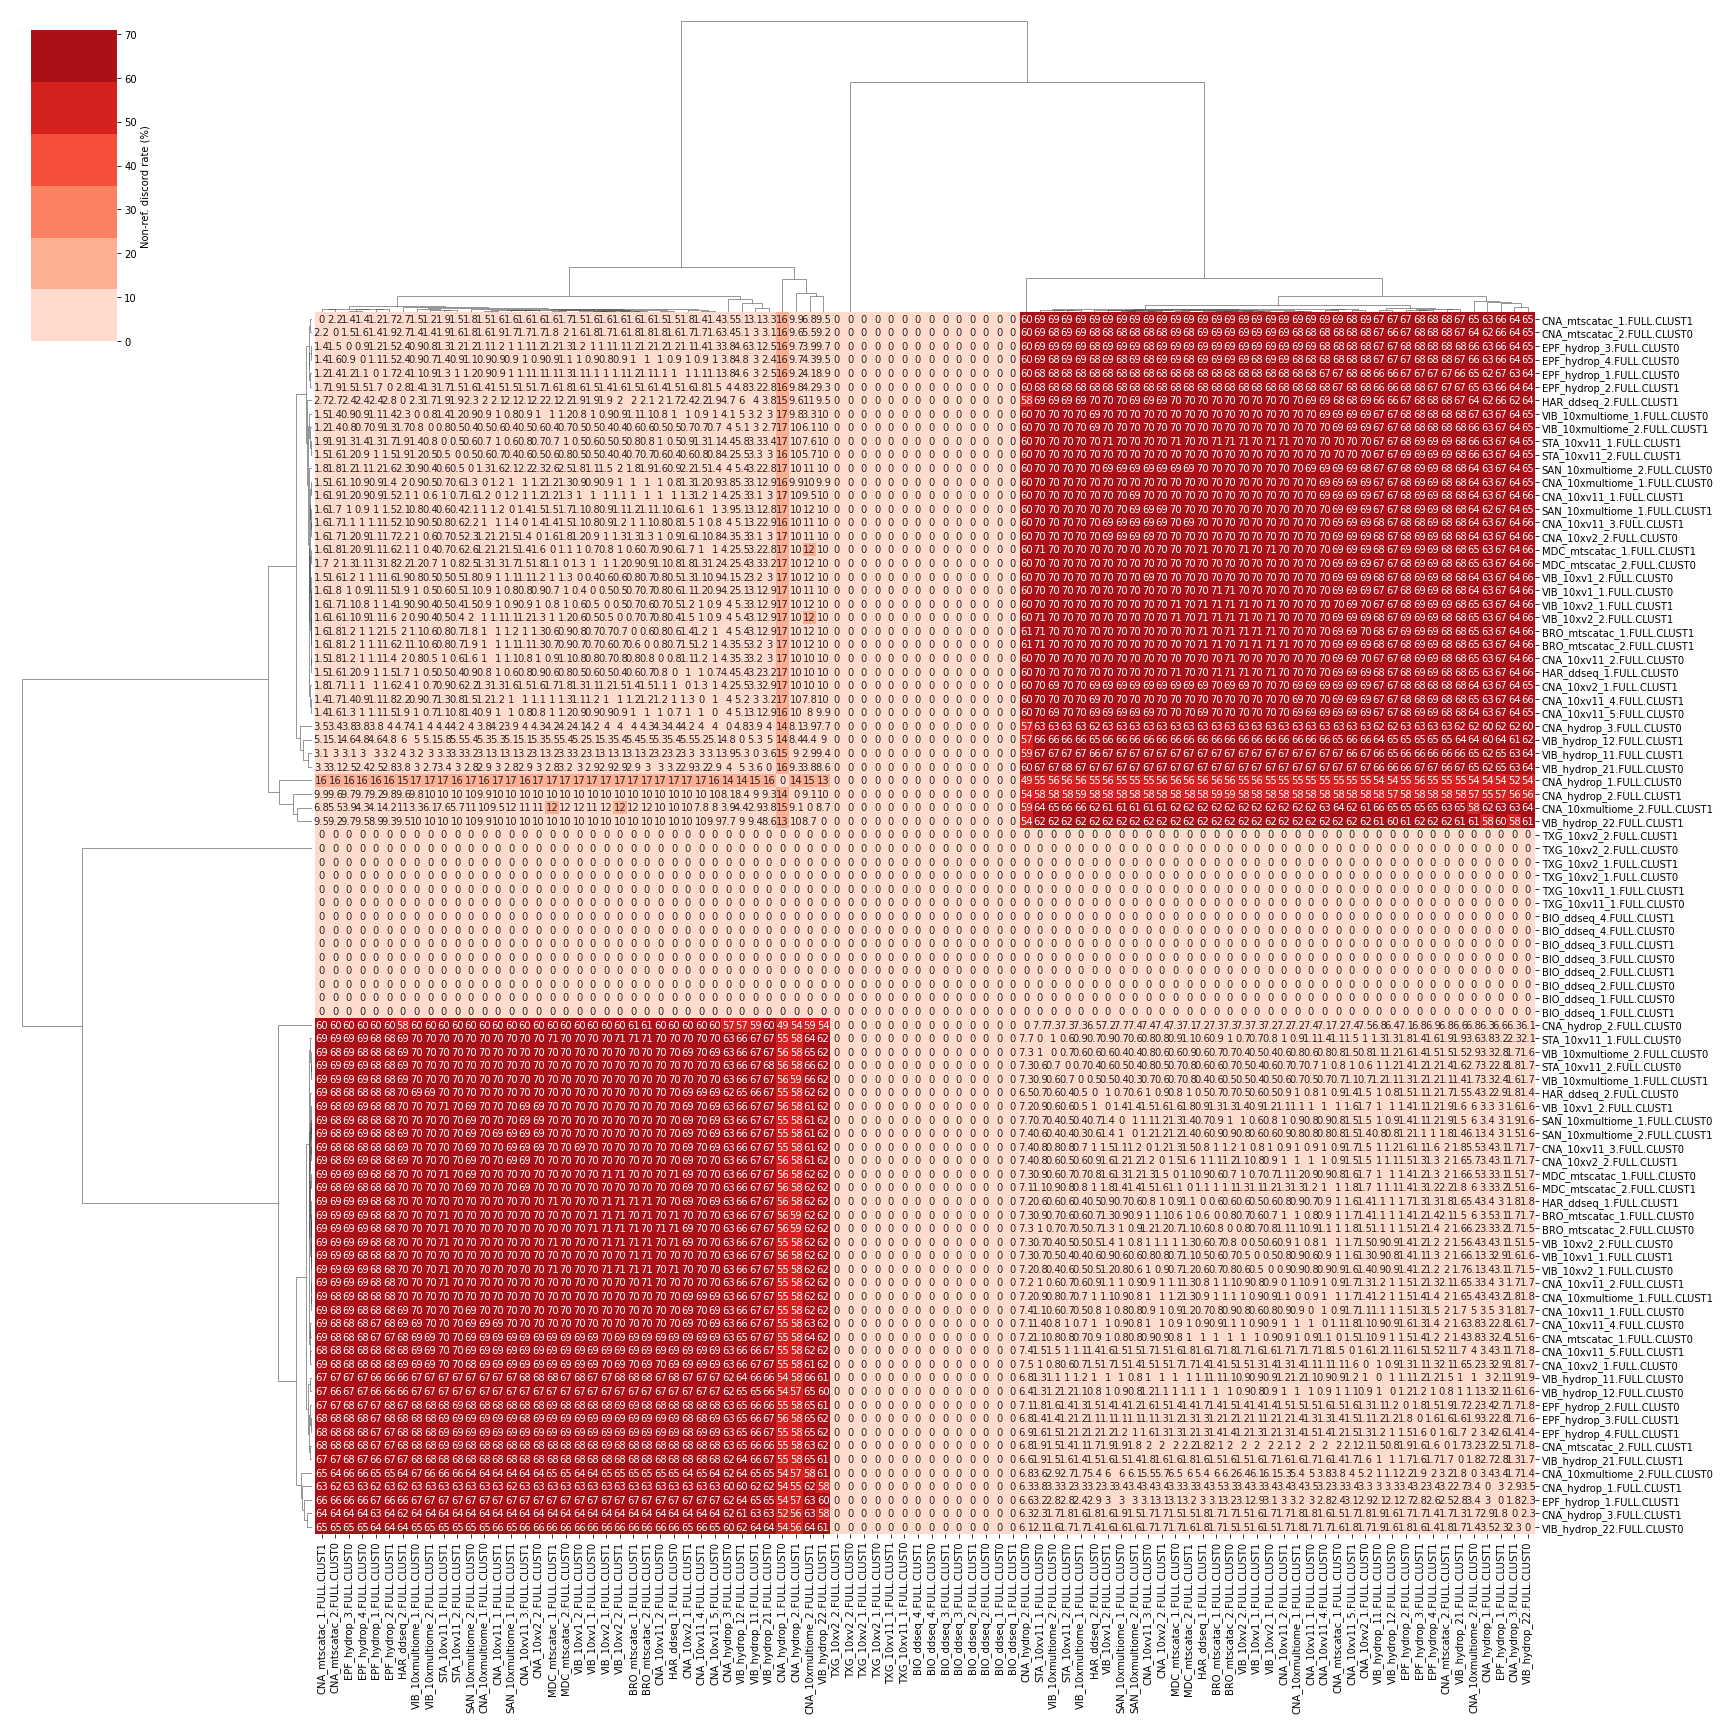

In [44]:
g = sns.clustermap(nrd.round(1), annot=True,  linecolor='gray',
                   yticklabels=True, xticklabels=True,
                   vmin=0.0, vmax=nrd.max().max(), # row_colors=colormap,
                   cmap=sns.color_palette('Reds'),
                   #cmap='vlag',
                   cbar_kws={'label': 'Non-ref. discord rate (%)'},
                   figsize=(24,24) )
g.cax.set_visible(True)
g.savefig('out_fmx/freemuxlet_nrd_fulldata.png', dpi=300, bbox_inches = "tight", facecolor='white')

Looking perfectly like we expected.

For the order:

In [76]:
order = [nrd.index[x] for x in g.dendrogram_col.reordered_ind]
top_n = 38
for line in ["'" + x[0:-7] + "', " for x in order][0:38]:
    print(line)

print('\n')

for line in ["c('" + x[0:-7] + "', " + x[-1] + ")," for x in order][0:38]:
    print(line)

'CNA_mtscatac_1.FULL', 
'CNA_mtscatac_2.FULL', 
'EPF_hydrop_3.FULL', 
'EPF_hydrop_4.FULL', 
'EPF_hydrop_1.FULL', 
'EPF_hydrop_2.FULL', 
'HAR_ddseq_2.FULL', 
'VIB_10xmultiome_1.FULL', 
'VIB_10xmultiome_2.FULL', 
'STA_10xv11_1.FULL', 
'STA_10xv11_2.FULL', 
'SAN_10xmultiome_2.FULL', 
'CNA_10xmultiome_1.FULL', 
'CNA_10xv11_1.FULL', 
'SAN_10xmultiome_1.FULL', 
'CNA_10xv11_3.FULL', 
'CNA_10xv2_2.FULL', 
'MDC_mtscatac_1.FULL', 
'MDC_mtscatac_2.FULL', 
'VIB_10xv1_2.FULL', 
'VIB_10xv1_1.FULL', 
'VIB_10xv2_1.FULL', 
'VIB_10xv2_2.FULL', 
'BRO_mtscatac_1.FULL', 
'BRO_mtscatac_2.FULL', 
'CNA_10xv11_2.FULL', 
'HAR_ddseq_1.FULL', 
'CNA_10xv2_1.FULL', 
'CNA_10xv11_4.FULL', 
'CNA_10xv11_5.FULL', 
'CNA_hydrop_3.FULL', 
'VIB_hydrop_12.FULL', 
'VIB_hydrop_11.FULL', 
'VIB_hydrop_21.FULL', 
'CNA_hydrop_1.FULL', 
'CNA_hydrop_2.FULL', 
'CNA_10xmultiome_2.FULL', 
'VIB_hydrop_22.FULL', 


c('CNA_mtscatac_1.FULL', 1),
c('CNA_mtscatac_2.FULL', 0),
c('EPF_hydrop_3.FULL', 0),
c('EPF_hydrop_4.FULL', 0),
c('EPF_hydro

Take the top n which belong to the pool to the following script.

# Run the R script to pair the genomes

In R image

In [ ]:
f_fmx_dir = 'out_fmx/data/freemuxlet/'

samples = c(
    'CNA_mtscatac_1.FULL', 
    'CNA_mtscatac_2.FULL', 
    'EPF_hydrop_3.FULL', 
    'EPF_hydrop_4.FULL', 
    'EPF_hydrop_1.FULL', 
    'EPF_hydrop_2.FULL', 
    'HAR_ddseq_2.FULL', 
    'VIB_10xmultiome_1.FULL', 
    'VIB_10xmultiome_2.FULL', 
    'STA_10xv11_1.FULL', 
    'STA_10xv11_2.FULL', 
    'SAN_10xmultiome_2.FULL', 
    'CNA_10xmultiome_1.FULL', 
    'CNA_10xv11_1.FULL', 
    'SAN_10xmultiome_1.FULL', 
    'CNA_10xv11_3.FULL', 
    'CNA_10xv2_2.FULL', 
    'MDC_mtscatac_1.FULL', 
    'MDC_mtscatac_2.FULL', 
    'VIB_10xv1_2.FULL', 
    'VIB_10xv1_1.FULL', 
    'VIB_10xv2_1.FULL', 
    'VIB_10xv2_2.FULL', 
    'BRO_mtscatac_1.FULL', 
    'BRO_mtscatac_2.FULL', 
    'CNA_10xv11_2.FULL', 
    'HAR_ddseq_1.FULL', 
    'CNA_10xv2_1.FULL', 
    'CNA_10xv11_4.FULL', 
    'CNA_10xv11_5.FULL', 
    'CNA_hydrop_3.FULL', 
    'VIB_hydrop_12.FULL', 
    'VIB_hydrop_11.FULL', 
    'VIB_hydrop_21.FULL', 
    'CNA_hydrop_1.FULL', 
    'CNA_hydrop_2.FULL', 
    'CNA_10xmultiome_2.FULL', 
    'VIB_hydrop_22.FULL'
    )

f_fmx = sapply(samples, function(s) paste0(f_fmx_dir,s,'_freemuxlet.clust1.samples.gz'))

fmx = lapply(f_fmx, read.delim, sep='\t', stringsAsFactors=FALSE)

# assign unique barcode:
for(i in 1:length(fmx)) {
    fmx[[i]]$ubarcode = paste(names(fmx)[i], "#", fmx[[i]]$BARCODE, sep="")
    fmx[[i]]$replicate = names(fmx)[i]
}


################################################################################
# freemuxlet sample pairing
################################################################################

# these groupings are made manually:
# based on the CLUST? in the heatmap

sampleA = list(
    c('CNA_mtscatac_1.FULL', 1),
    c('CNA_mtscatac_2.FULL', 0),
    c('EPF_hydrop_3.FULL', 0),
    c('EPF_hydrop_4.FULL', 0),
    c('EPF_hydrop_1.FULL', 0),
    c('EPF_hydrop_2.FULL', 1),
    c('HAR_ddseq_2.FULL', 1),
    c('VIB_10xmultiome_1.FULL', 0),
    c('VIB_10xmultiome_2.FULL', 1),
    c('STA_10xv11_1.FULL', 1),
    c('STA_10xv11_2.FULL', 1),
    c('SAN_10xmultiome_2.FULL', 0),
    c('CNA_10xmultiome_1.FULL', 0),
    c('CNA_10xv11_1.FULL', 1),
    c('SAN_10xmultiome_1.FULL', 1),
    c('CNA_10xv11_3.FULL', 1),
    c('CNA_10xv2_2.FULL', 0),
    c('MDC_mtscatac_1.FULL', 1),
    c('MDC_mtscatac_2.FULL', 0),
    c('VIB_10xv1_2.FULL', 0),
    c('VIB_10xv1_1.FULL', 0),
    c('VIB_10xv2_1.FULL', 1),
    c('VIB_10xv2_2.FULL', 1),
    c('BRO_mtscatac_1.FULL', 1),
    c('BRO_mtscatac_2.FULL', 1),
    c('CNA_10xv11_2.FULL', 0),
    c('HAR_ddseq_1.FULL', 0),
    c('CNA_10xv2_1.FULL', 1),
    c('CNA_10xv11_4.FULL', 1),
    c('CNA_10xv11_5.FULL', 0),
    c('CNA_hydrop_3.FULL', 0),
    c('VIB_hydrop_12.FULL', 1),
    c('VIB_hydrop_11.FULL', 1),
    c('VIB_hydrop_21.FULL', 0),
    c('CNA_hydrop_1.FULL', 0),
    c('CNA_hydrop_2.FULL', 1),
    c('CNA_10xmultiome_2.FULL', 1),
    c('VIB_hydrop_22.FULL', 1)
)

sampleB = lapply(sampleA, function(A) c(A[1], ifelse(A[2]==0,1,0)) )


fmxA = list()
for(i in 1:length(sampleA)) {
    rep = sampleA[[i]][1]
    clust = sampleA[[i]][2]
    tmp = fmx[[rep]]
    bestguess = paste(clust,',',clust,sep="")
    ix = which(tmp$BEST.GUESS==bestguess)
    tmp = tmp[ix,]
    tmp$replicate = rep
    tmp$sample = "sampleA"
    fmxA[[i]] = tmp
}
fmxB = list()
for(i in 1:length(sampleB)) {
    rep = sampleB[[i]][1]
    clust = sampleB[[i]][2]
    tmp = fmx[[rep]]
    bestguess = paste(clust,',',clust,sep="")
    ix = which(tmp$BEST.GUESS==bestguess)
    tmp = tmp[ix,]
    tmp$replicate = rep
    tmp$sample = "sampleB"
    fmxB[[i]] = tmp
}

fmxA = do.call("rbind",fmxA)
fmxB = do.call("rbind",fmxB)


# unified table:
fmx = do.call(rbind,fmx)

# check there are no unexpected intersections
intersect(fmxA$ubarcode,fmxB$ubarcode)

ixA = which(fmx$ubarcode %in% fmxA$ubarcode)
ixB = which(fmx$ubarcode %in% fmxB$ubarcode)
intersect(ixA,ixB)


fmx$sample = 'Undetermined'
fmx$sample[ixA] = "sampleA"
fmx$sample[ixB] = "sampleB"

write.table(fmx, file="out_fmx/genotype_concordance_unified.txt", sep='\t', quote=FALSE )

In [ ]:
singularity run --cleanenv -H $PWD -B /lustre1,/staging,${VSC_SCRATCH}/tmp:/tmp /staging/leuven/stg_00002/lcb/cflerin/containers/cflerin-seurat-4.0.3-plus.sif

# Then, proceed again in python
 Yes, I know this is a horrible way of working.

In [77]:
f_gc = 'out_fmx/genotype_concordance_unified.txt'

gc = pd.read_csv(f_gc, sep='\t')
gc

,INT_ID,BARCODE,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,...,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL,ubarcode,replicate,sample
CNA_mtscatac_1.FULL.1,0,GTCCCAGGAAAGGCCA,2339,2339,SNG,"1,1",-4102.33,"1,0",-4403.45,301.12,...,-4102.33,0,-5006.85,1.00000,"1,0",-4403.45,301.12,CNA_mtscatac_1.FULL#GTCCCAGGAAAGGCCA,CNA_mtscatac_1.FULL,sampleA
CNA_mtscatac_1.FULL.2,1,TGCGAGGCTCTGCCAG,1738,1738,SNG,"0,0",-3068.55,"1,0",-3307.30,238.75,...,-3068.55,1,-3808.83,1.00000,"1,0",-3307.30,238.75,CNA_mtscatac_1.FULL#TGCGAGGCTCTGCCAG,CNA_mtscatac_1.FULL,sampleB
CNA_mtscatac_1.FULL.3,2,AGCGTATACCAATAGA,5432,5432,SNG,"1,1",-9844.04,"1,0",-10194.35,350.30,...,-9844.04,0,-11116.48,1.00000,"1,0",-10194.35,350.30,CNA_mtscatac_1.FULL#AGCGTATACCAATAGA,CNA_mtscatac_1.FULL,sampleA
CNA_mtscatac_1.FULL.4,3,TGTCGAAACGACCGAA,1196,1196,SNG,"1,1",-2089.42,"1,0",-2240.71,151.28,...,-2089.42,0,-2537.00,1.00000,"1,0",-2240.71,151.28,CNA_mtscatac_1.FULL#TGTCGAAACGACCGAA,CNA_mtscatac_1.FULL,sampleA
CNA_mtscatac_1.FULL.5,4,AGGTCAGGACGGTTGC,6424,6424,SNG,"1,1",-11307.49,"1,0",-12145.77,838.28,...,-11307.49,0,-13886.90,1.00000,"1,0",-12145.77,838.28,CNA_mtscatac_1.FULL#AGGTCAGGACGGTTGC,CNA_mtscatac_1.FULL,sampleA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_22.FULL.965,964,TAACCGAATCTCTCGCACGA,227,227,SNG,"0,0",-404.03,"1,0",-432.16,28.13,...,-404.03,1,-495.29,1.00000,"1,0",-432.16,28.13,VIB_hydrop_22.FULL#TAACCGAATCTCTCGCACGA,VIB_hydrop_22.FULL,sampleB
VIB_hydrop_22.FULL.966,965,AACGATACCATGCTTGCCGT,175,175,SNG,"0,0",-315.26,"1,0",-335.18,19.92,...,-315.26,1,-385.62,1.00000,"1,0",-335.18,19.92,VIB_hydrop_22.FULL#AACGATACCATGCTTGCCGT,VIB_hydrop_22.FULL,sampleB
VIB_hydrop_22.FULL.967,966,GATTGGCGGTGTCCAGGCTT,274,274,SNG,"0,0",-481.27,"1,0",-513.34,32.07,...,-481.27,1,-582.89,1.00000,"1,0",-513.34,32.07,VIB_hydrop_22.FULL#GATTGGCGGTGTCCAGGCTT,VIB_hydrop_22.FULL,sampleB
VIB_hydrop_22.FULL.968,967,CGTTGACCACGGTAGGTAGG,172,172,SNG,"1,1",-312.80,"1,0",-321.39,8.59,...,-312.80,0,-342.76,1.00000,"1,0",-321.39,8.59,VIB_hydrop_22.FULL#CGTTGACCACGGTAGGTAGG,VIB_hydrop_22.FULL,sampleA


### Freemuxlet plots

Loading data from unified fmeemuxlet annotations (inferred samples are linked)

In [78]:
#

tp = gc[['replicate','sample']].copy()
tp['droplet_type'] = tp['sample'].copy()
tp.loc[ tp['droplet_type']=='Undetermined', 'droplet_type'] = 'Doublet'
tp = tp.groupby(['replicate','droplet_type']).size().rename('count').reset_index()

tp.columns = ['sampleId','droplet_type','count']
tp.sort_values('sampleId', inplace=True)
tp

,sampleId,droplet_type,count
0,BRO_mtscatac_1.FULL,Doublet,28
1,BRO_mtscatac_1.FULL,sampleA,1811
2,BRO_mtscatac_1.FULL,sampleB,1737
3,BRO_mtscatac_2.FULL,Doublet,25
4,BRO_mtscatac_2.FULL,sampleA,1771
...,...,...,...
104,VIB_hydrop_21.FULL,Doublet,32
106,VIB_hydrop_21.FULL,sampleB,1148
108,VIB_hydrop_22.FULL,sampleA,428
107,VIB_hydrop_22.FULL,Doublet,1


In [79]:
# get all unique freemuxlet calls:
# bgu = tp['droplet_type'].unique()
# bgu.sort()
bgu = ['sampleA', 'Doublet', 'sampleB']

In [84]:
bgu = tp['droplet_type'].unique()
bgu

array(['Doublet', 'sampleA', 'sampleB'], dtype=object)

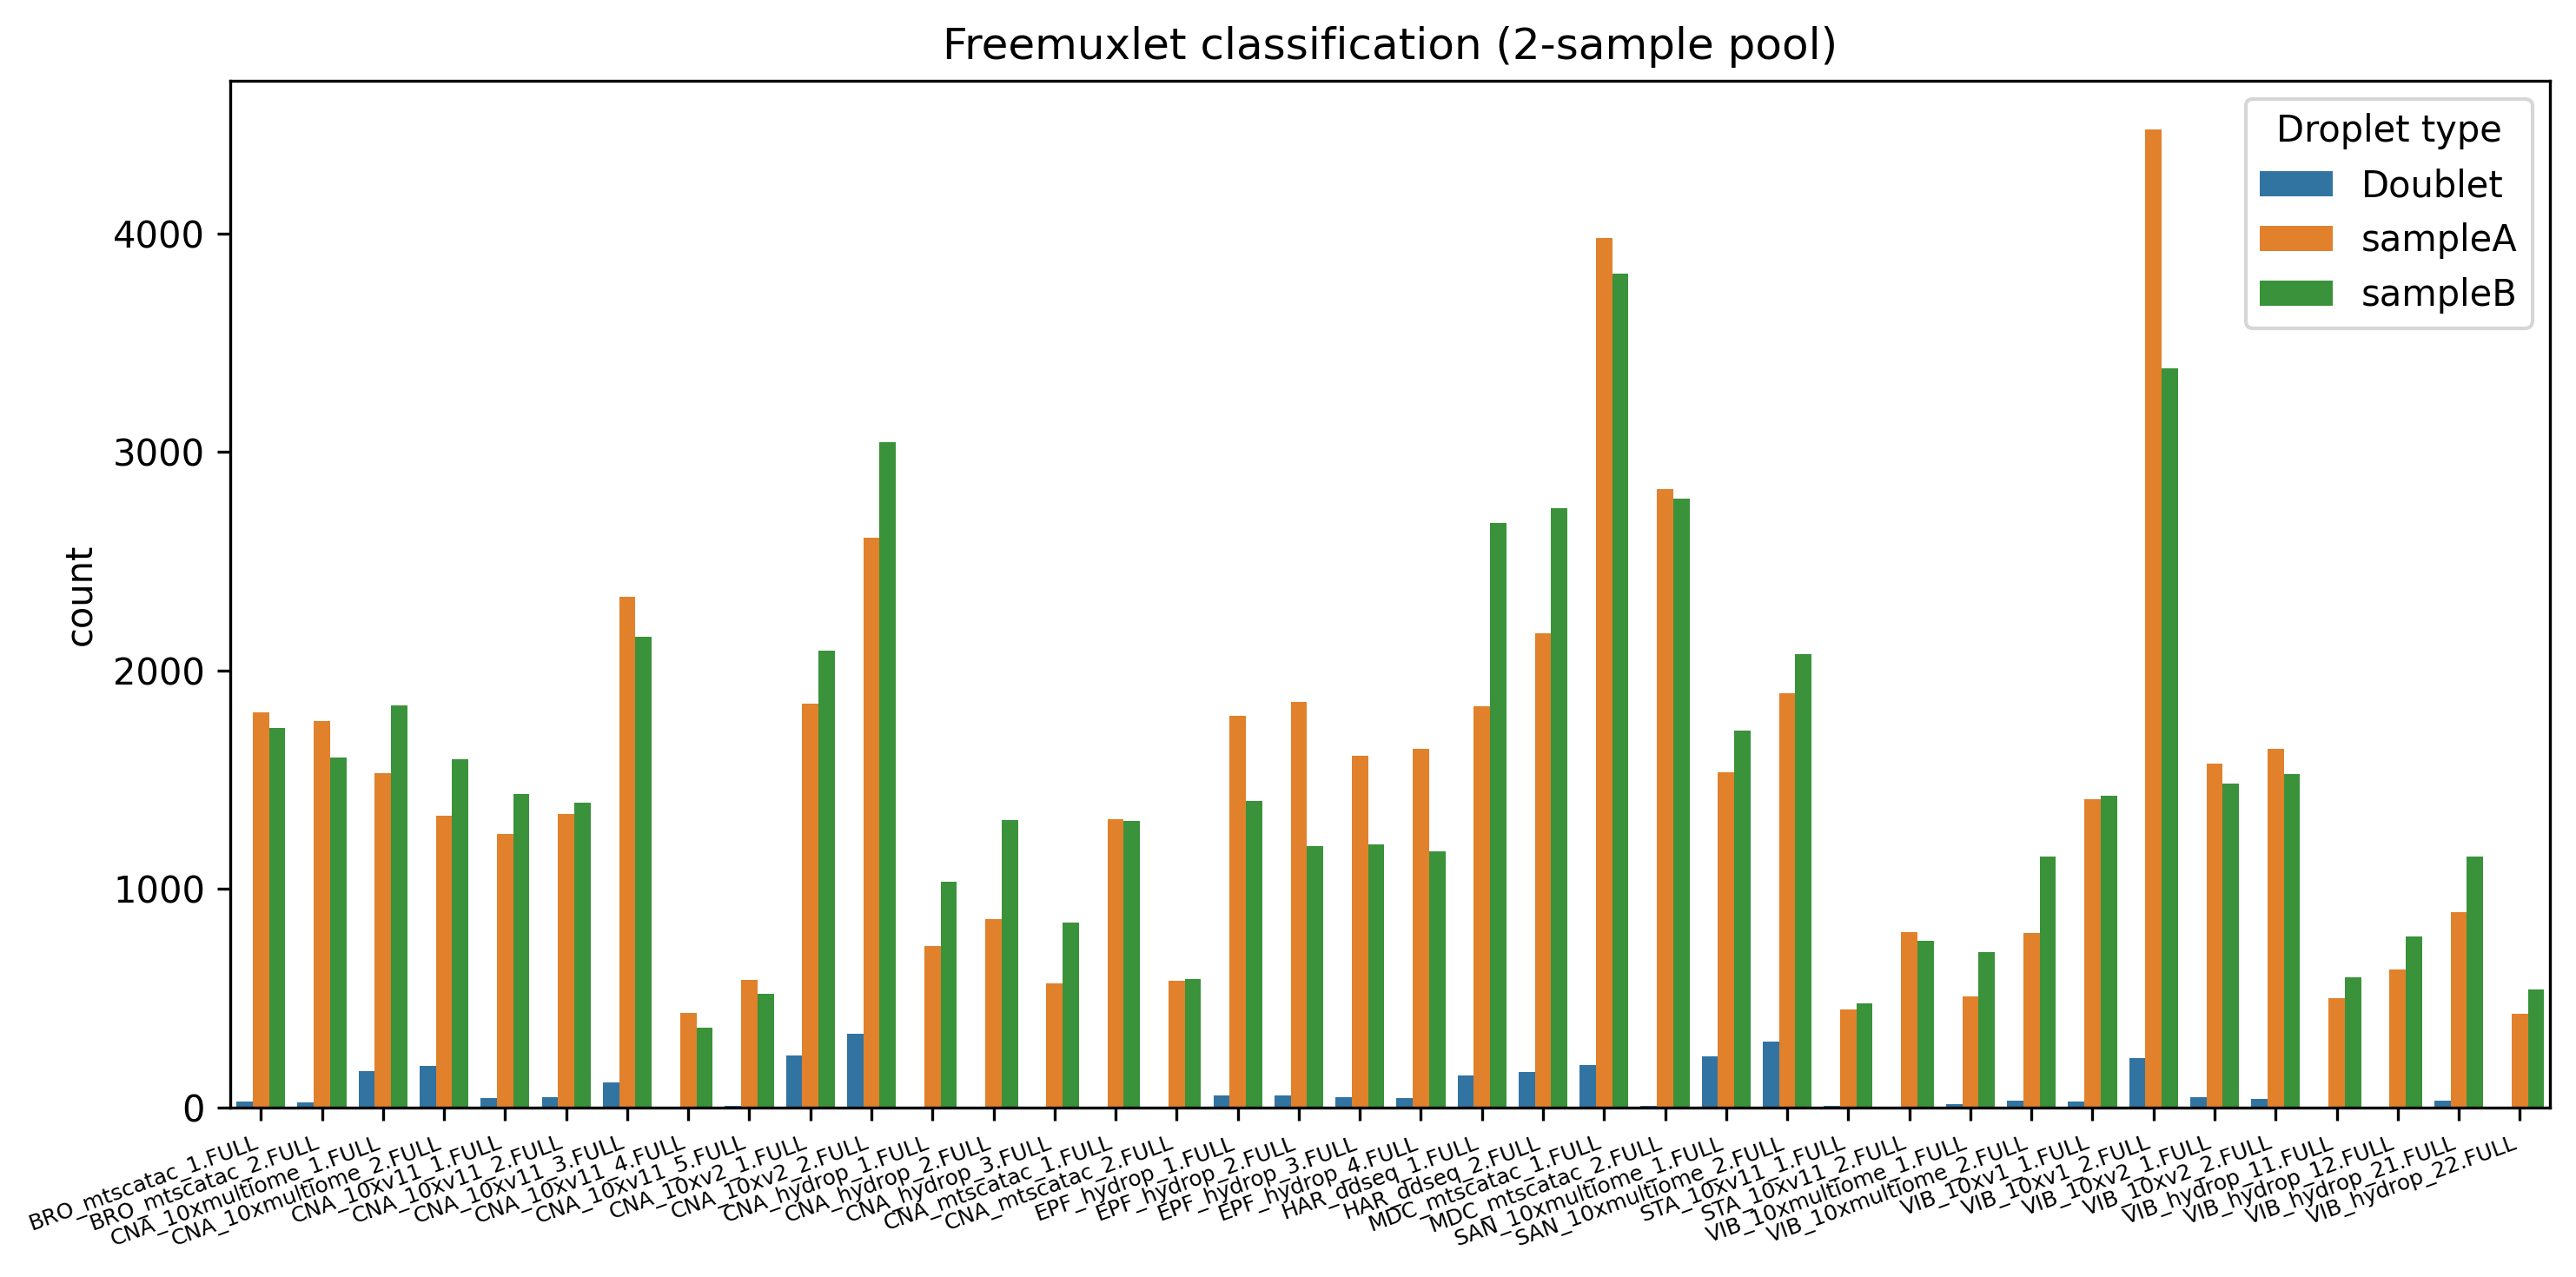

In [82]:
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=300)

g = sns.barplot(x="sampleId", y="count", hue="droplet_type", data=tp, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=20, ha='right', fontsize=6)

ax.set_title('Freemuxlet classification (2-sample pool)')
ax.legend(title='Droplet type')
ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [86]:
csum = pd.DataFrame([], index=tp['sampleId'].unique() )
#csum['lower']=0
for y in bgu:
    #print(tp[ tp['droplet_type']==y ])
    tmp = tp[ tp['droplet_type']==y ].set_index('sampleId')
    #csum[y] = pd.merge(csum, tmp['count'], left_index=True, right_index=True, how='left').sum(axis=1)
    csum[y] = tmp['count']
    
csum.fillna(0,inplace=True)
csum

,Doublet,sampleA,sampleB
BRO_mtscatac_1.FULL,28.0,1811,1737
BRO_mtscatac_2.FULL,25.0,1771,1603
CNA_10xmultiome_1.FULL,166.0,1532,1839
CNA_10xmultiome_2.FULL,190.0,1337,1596
CNA_10xv11_1.FULL,44.0,1253,1437
CNA_10xv11_2.FULL,49.0,1342,1395
CNA_10xv11_3.FULL,114.0,2336,2154
CNA_10xv11_4.FULL,3.0,435,366
CNA_10xv11_5.FULL,7.0,584,521
CNA_10xv2_1.FULL,237.0,1850,2093


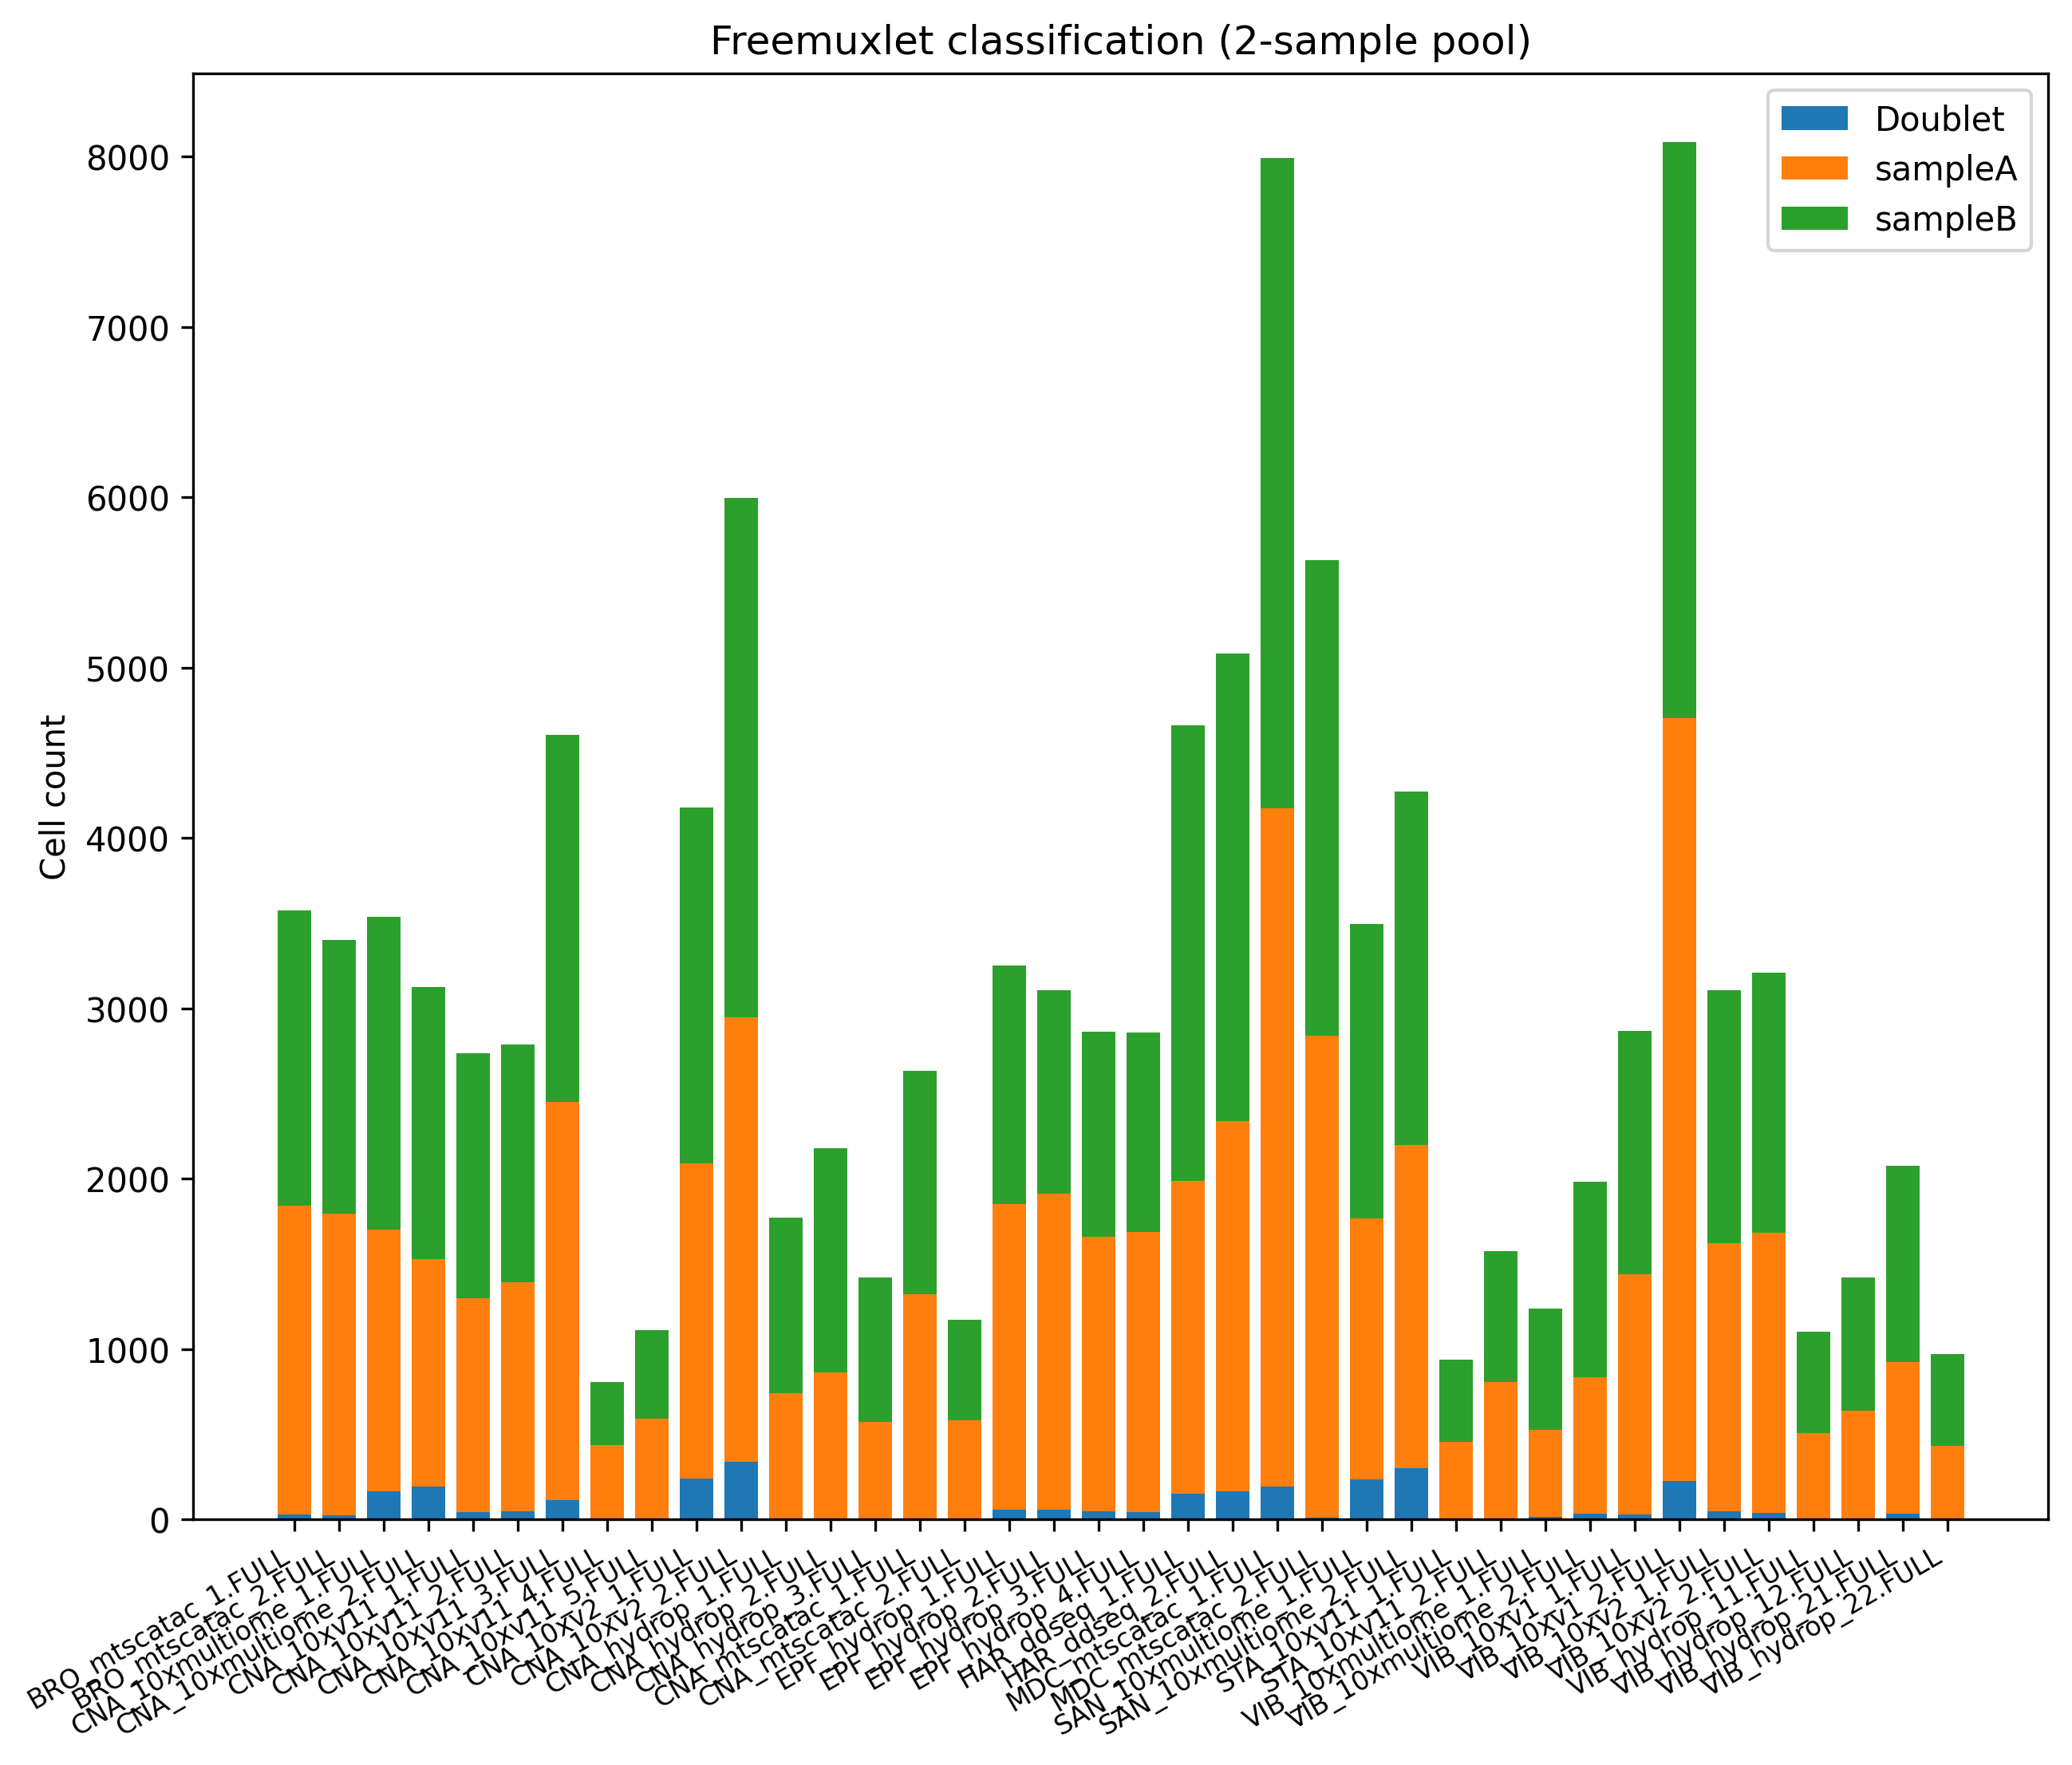

In [89]:
fig, ax = plt.subplots(1,1, figsize=(10,8), dpi=300 )

width=0.75

lower = pd.DataFrame([], index=tp['sampleId'].unique() )
lower['lower']=0
for y in bgu:
    ax.bar(x=csum.index, height=csum[y], width=width, bottom=lower['lower'], label=y)#, color='#377CB6')
    lower['lower'] = csum.iloc[:,:(csum.columns.get_loc(y)+1) ].sum(axis=1)

ax.set_ylabel('Cell count')
ax.set_xlabel('')
plt.xticks(rotation=30, ha='right', fontsize=8)

ax.set_title('Freemuxlet classification (2-sample pool)')
ax.legend()#title='Freemuxlet')
plt.savefig('plots_qc/freemuxlet_counts.png', facecolor='white')
plt.show()